**Importing necessary libraries **

In [3]:
import torch
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd


**Setting random weights and seed value**

In [8]:
# True weights and bias
true_weights = 4.0
true_bias = -1.0

# Set a random seed for reproducibility
torch.manual_seed(0)

# Generate random x values
x = torch.rand(100)


**Generating random noise and plotting data**

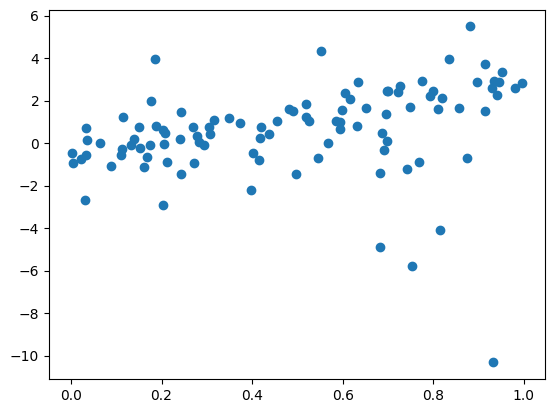

In [9]:
# Generate random noise with outliers using a Student's t-distribution
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)

# Generate true y values with the linear relationship
y_true = true_weights * x + noise + true_bias

# Plot the scatterplot
plt.scatter(x, y_true)
plt.show()

**Computing MSE and MAE and observing the slope difference**

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

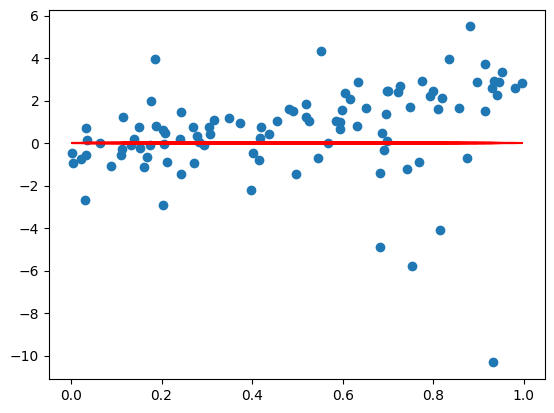

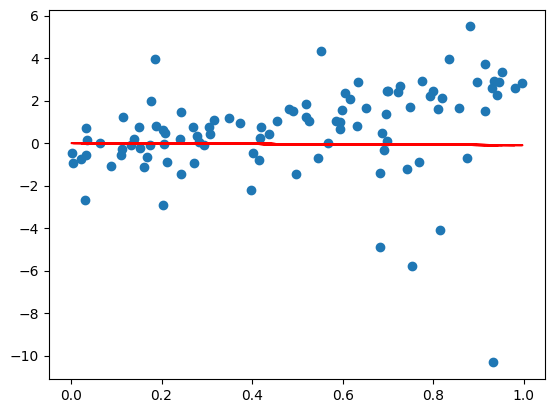

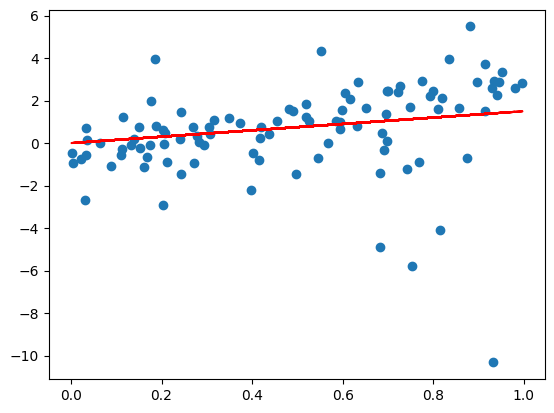

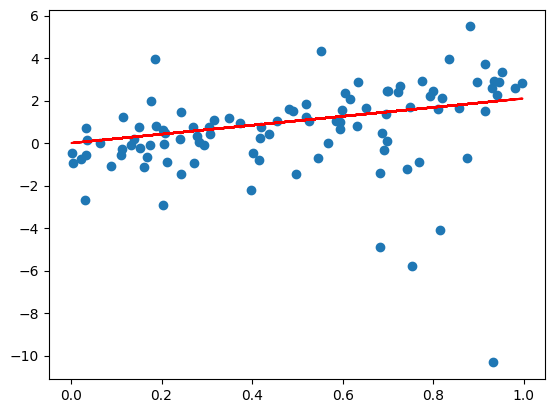

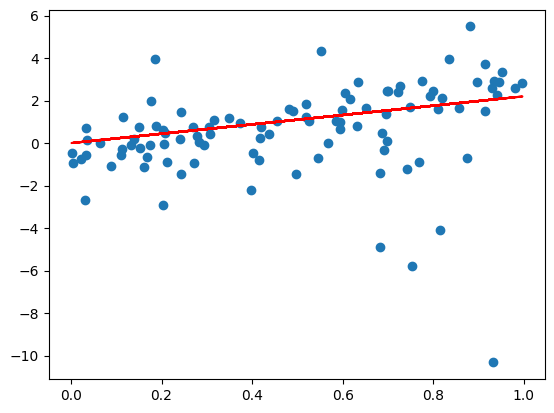

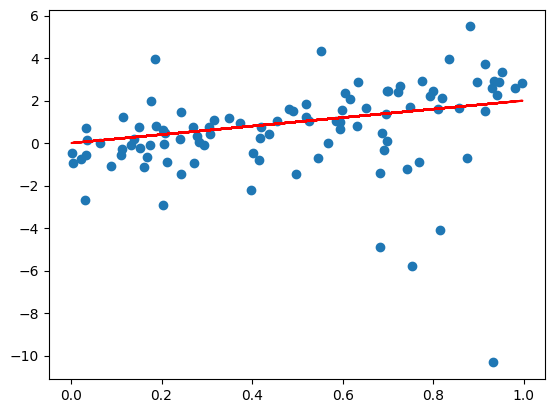

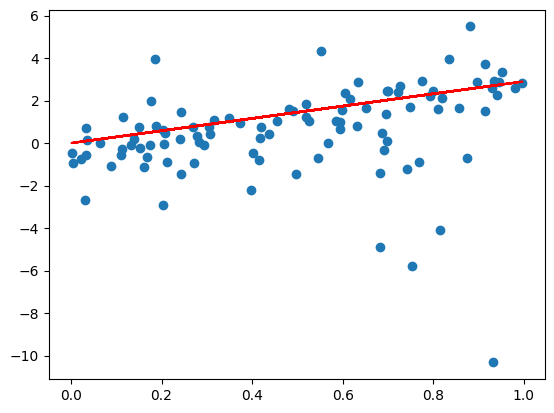

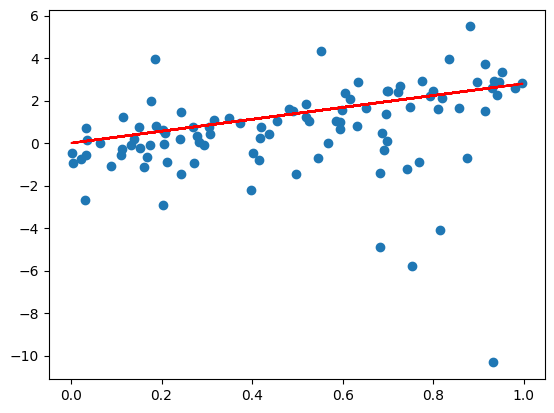

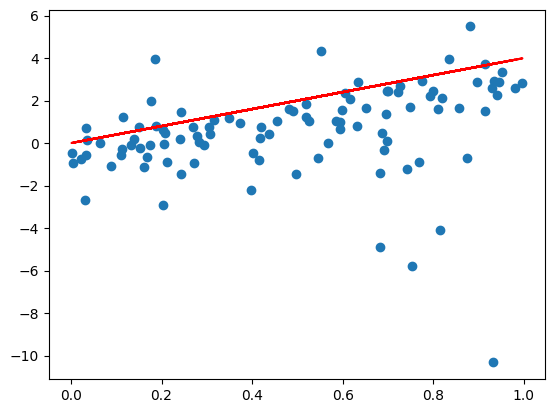

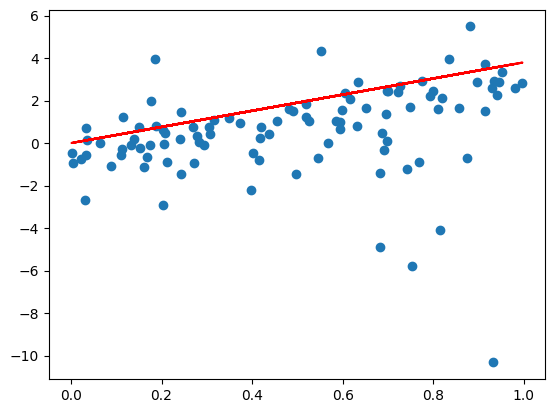

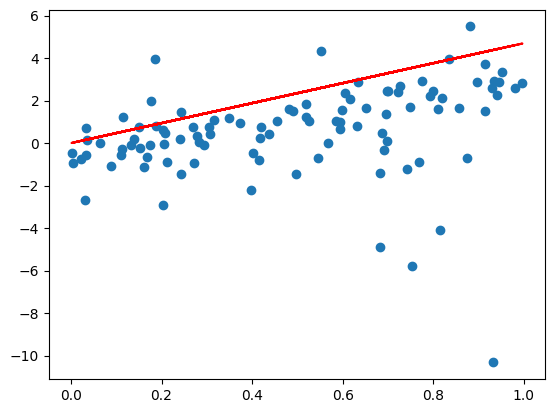

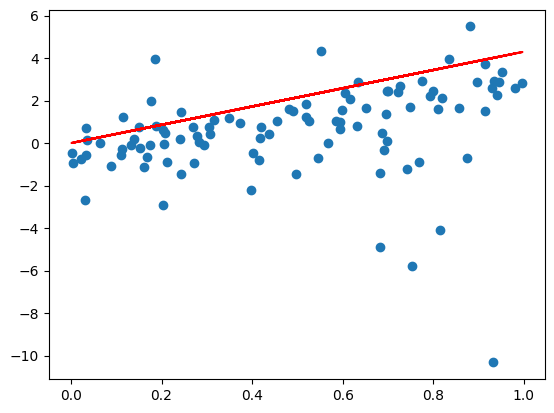

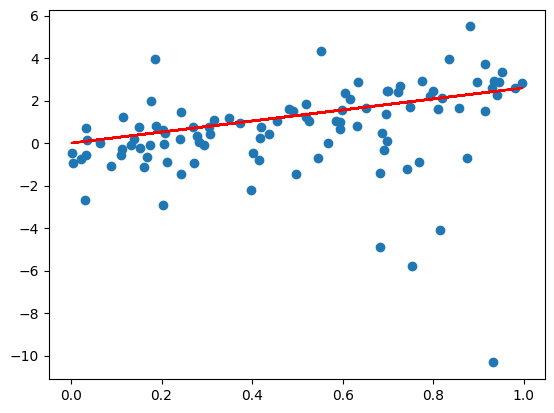

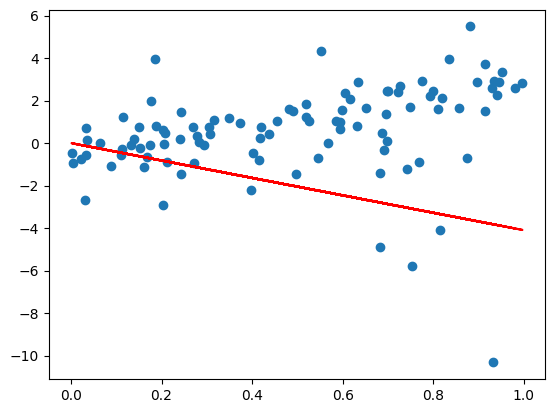

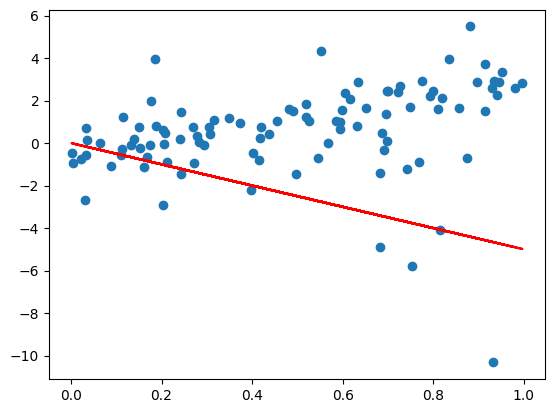

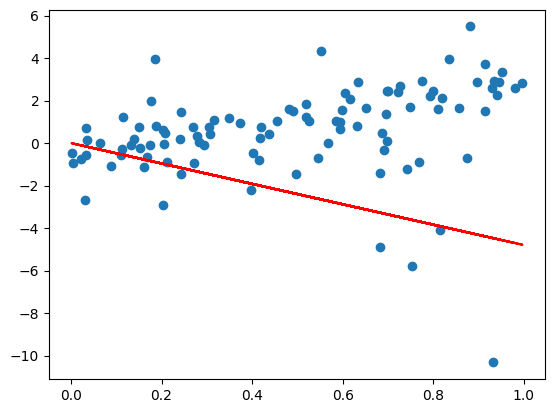

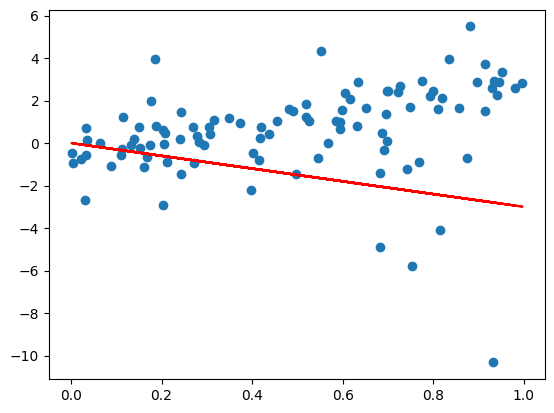

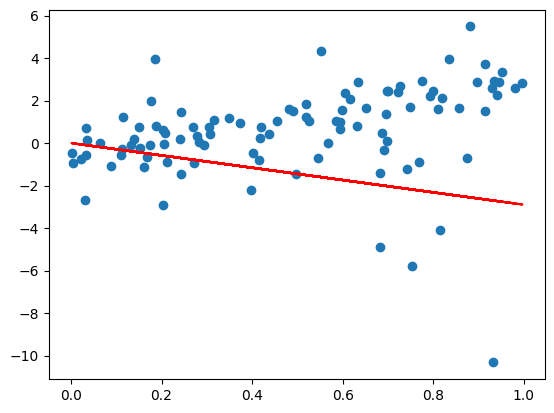

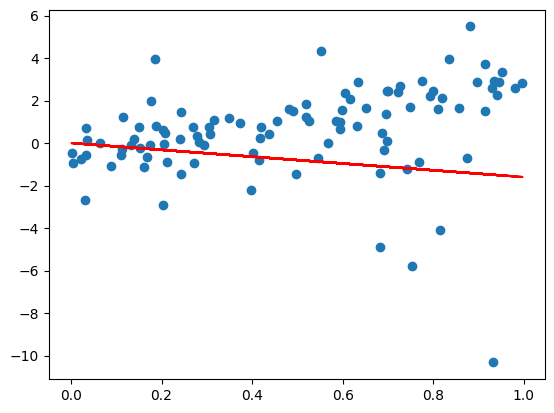

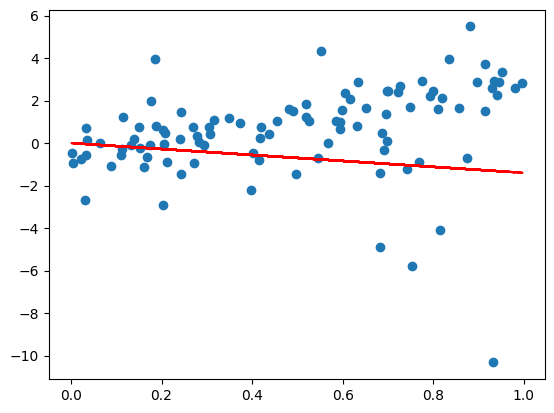

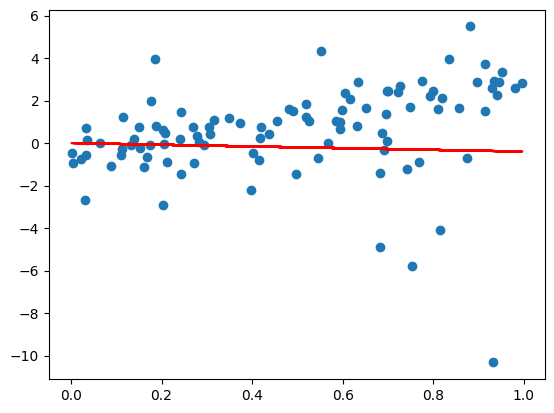

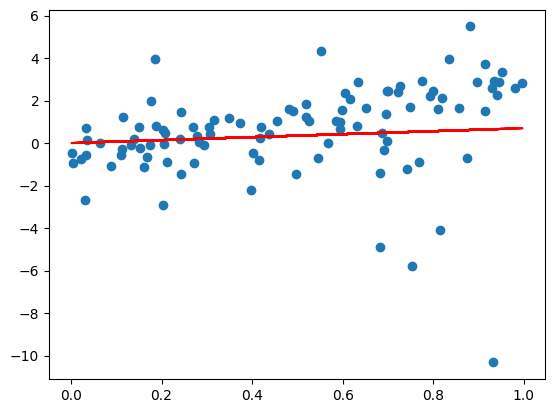

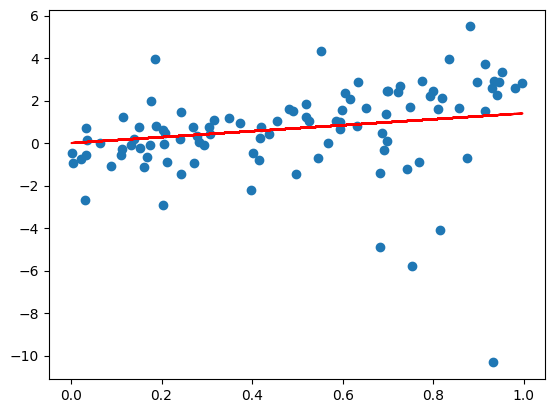

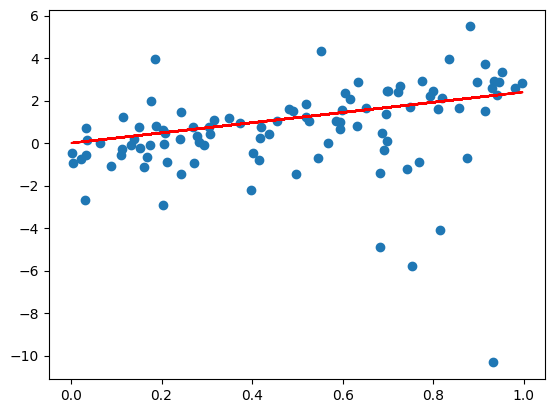

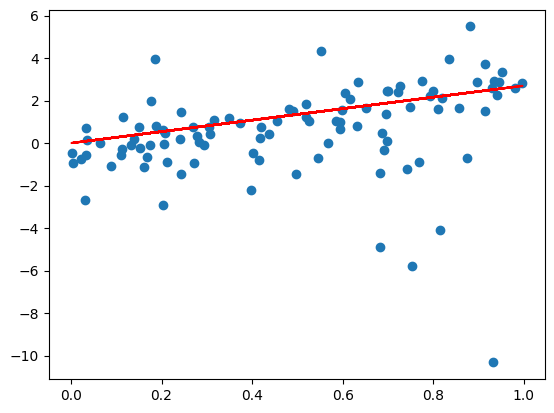

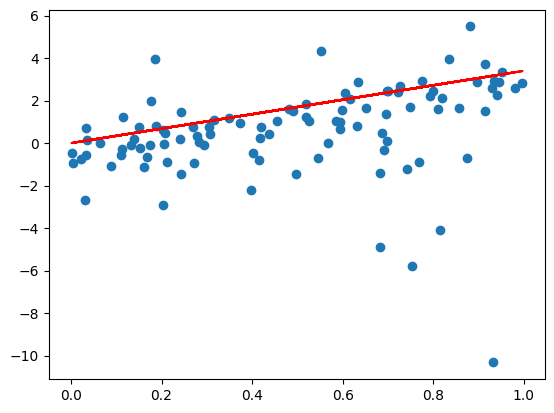

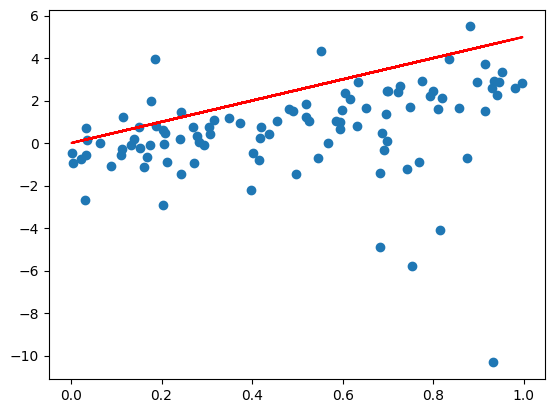

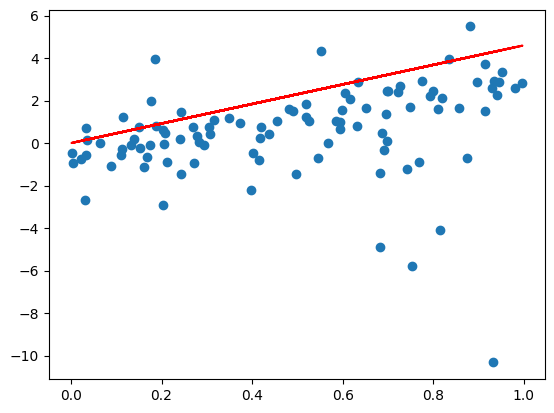

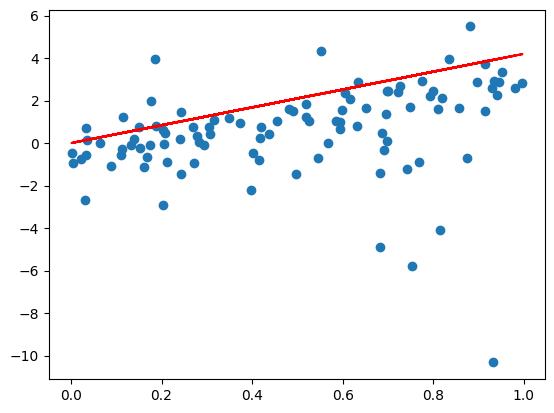

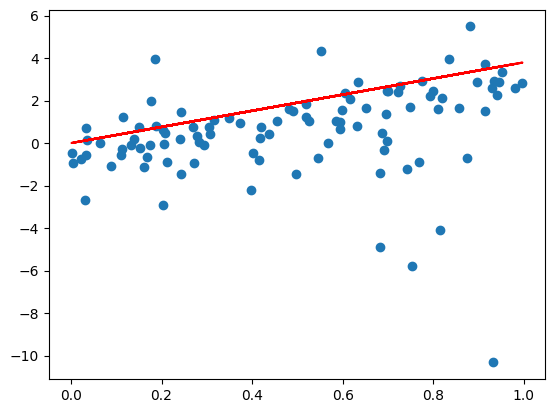

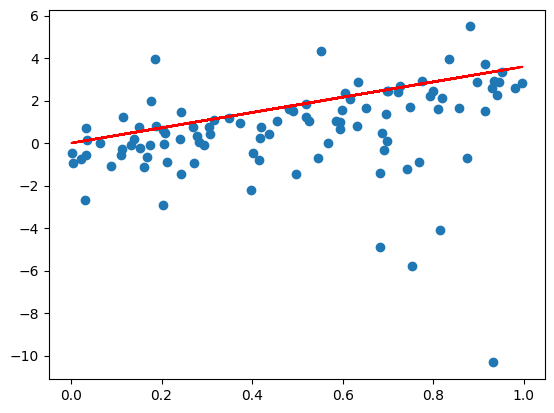

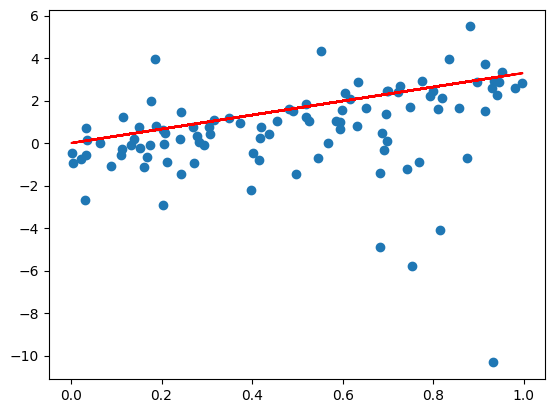

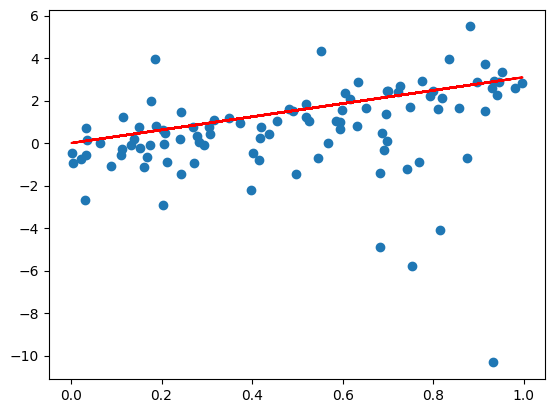

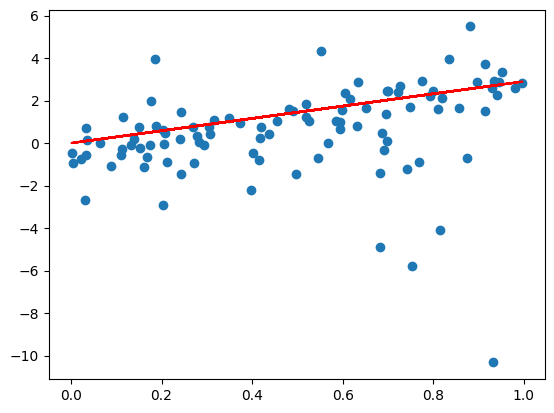

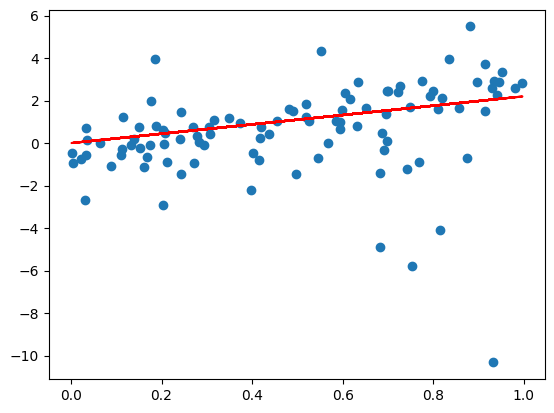

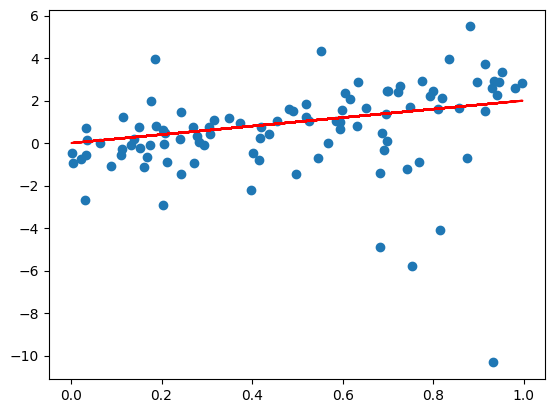

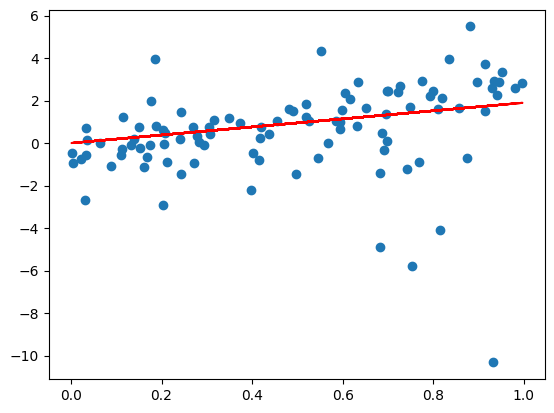

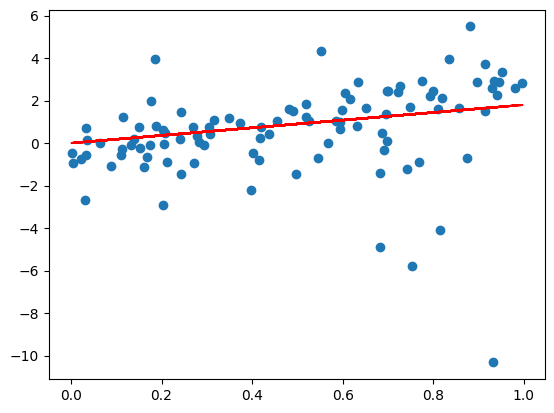

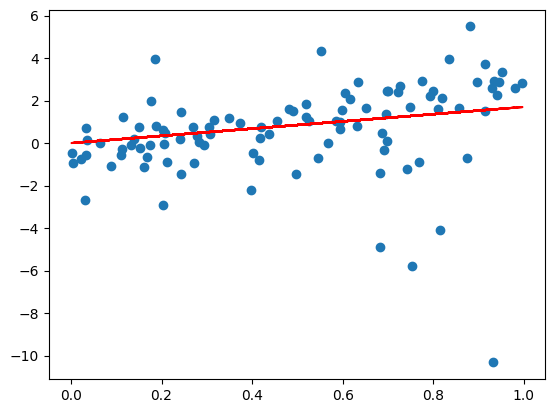

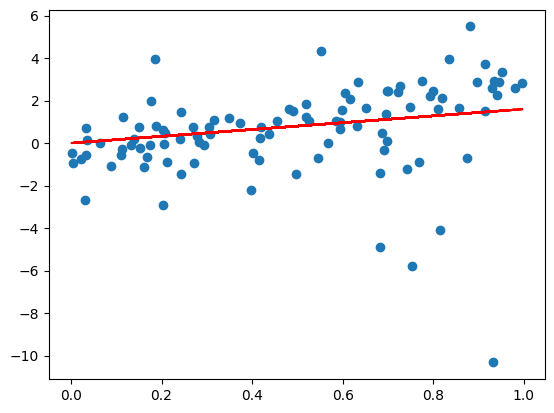

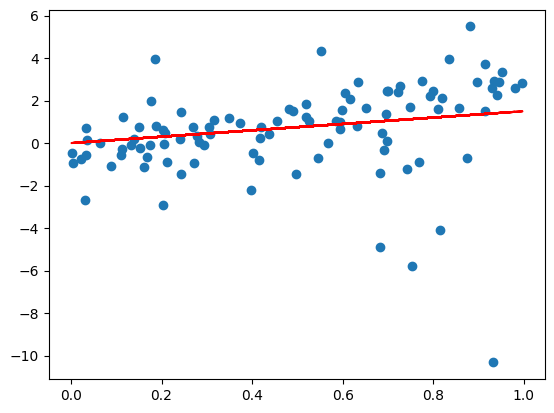

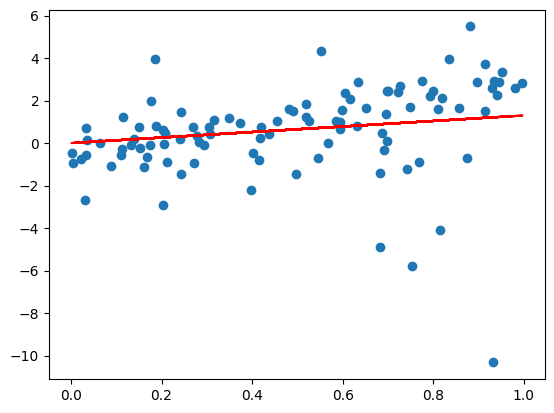

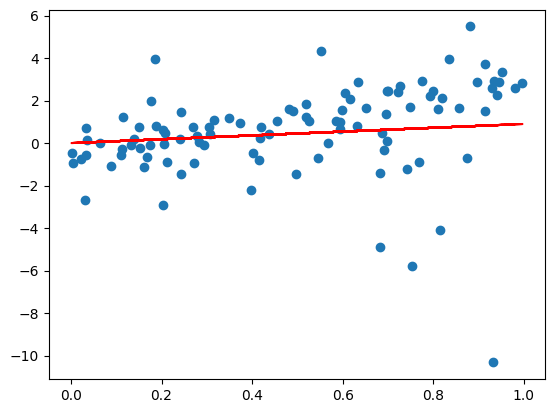

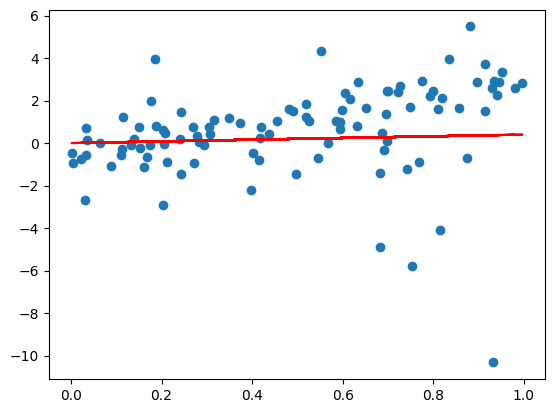

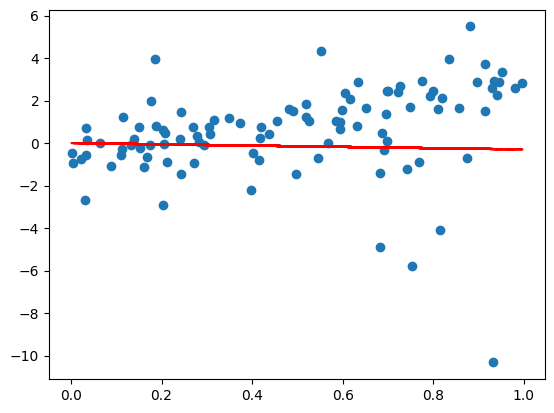

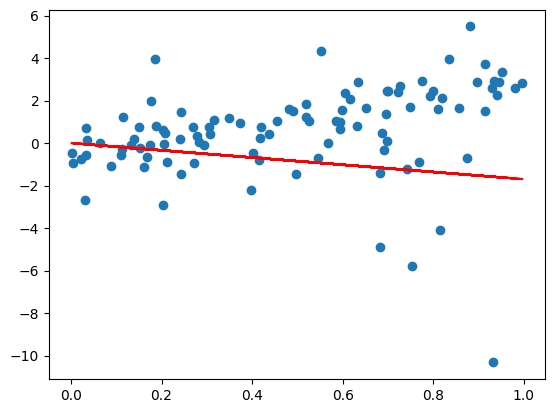

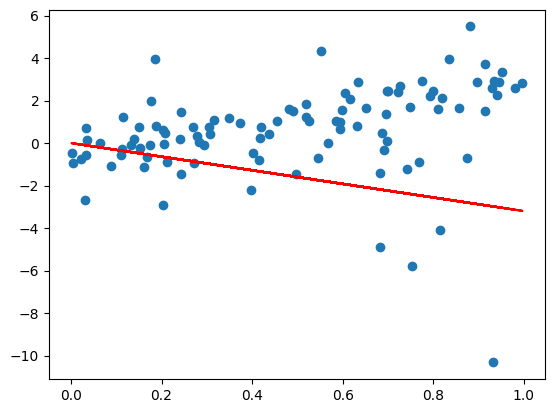

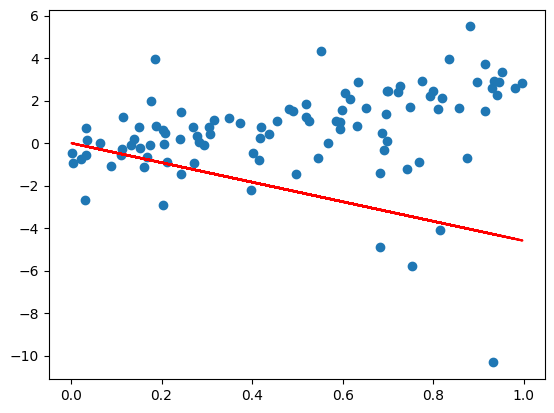

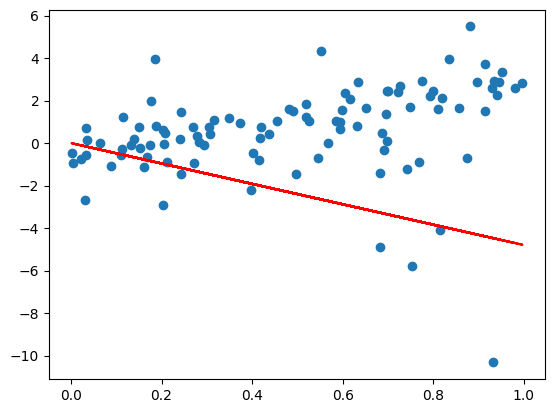

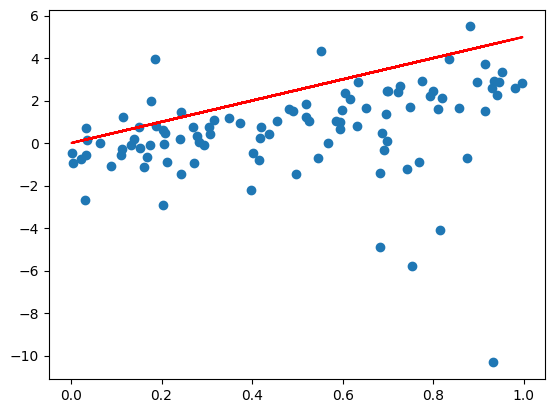

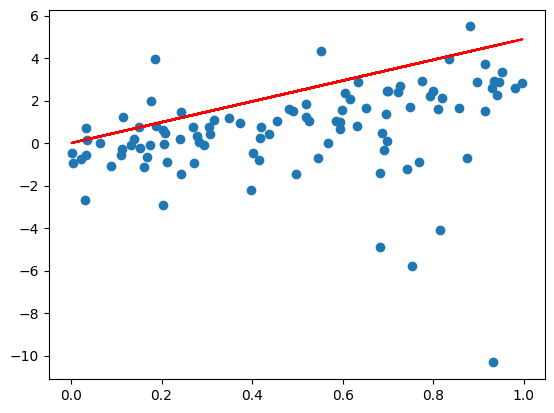

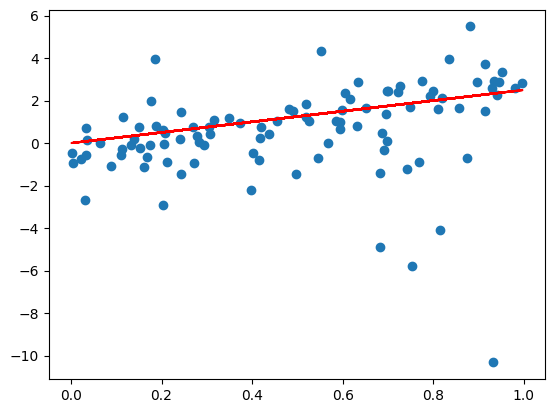

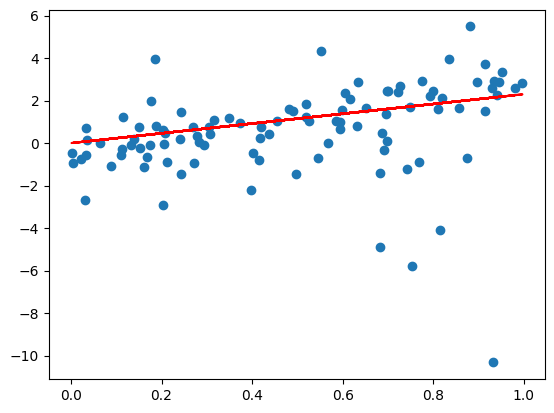

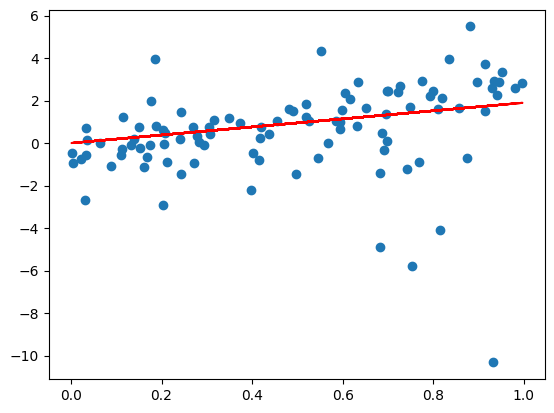

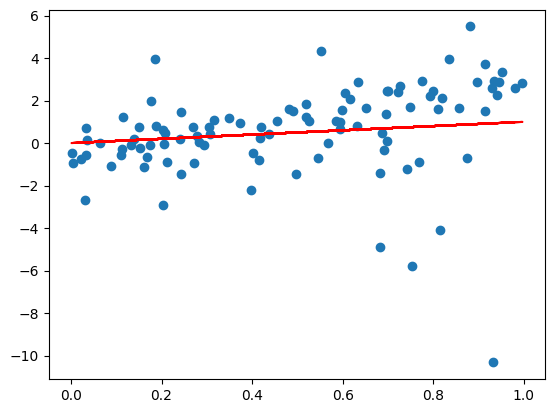

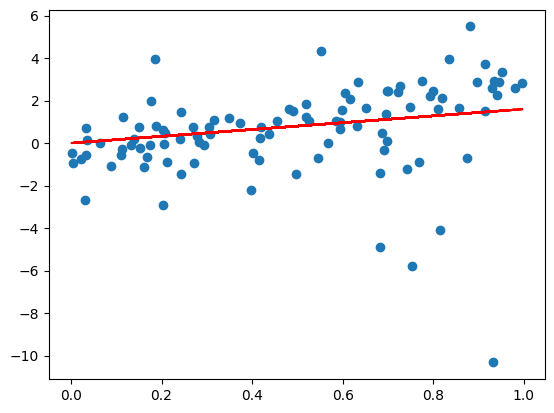

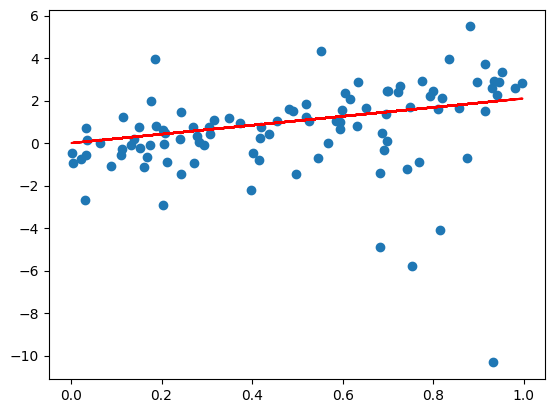

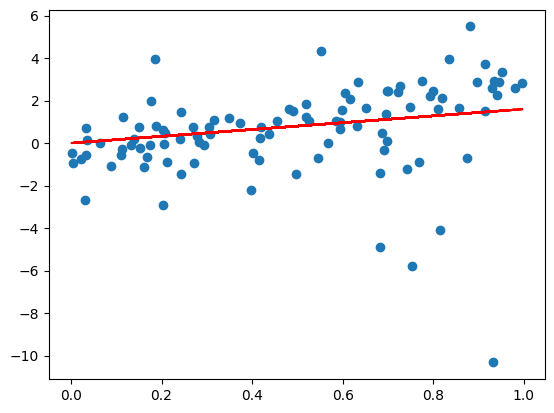

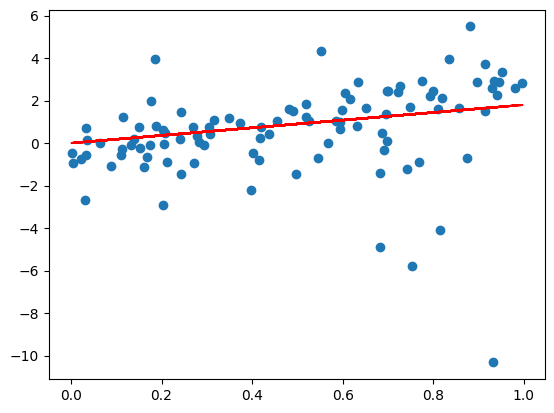

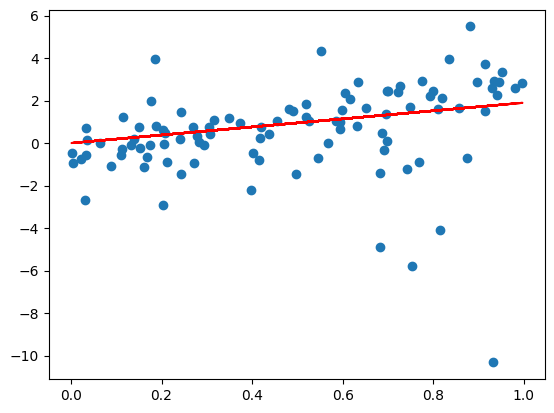

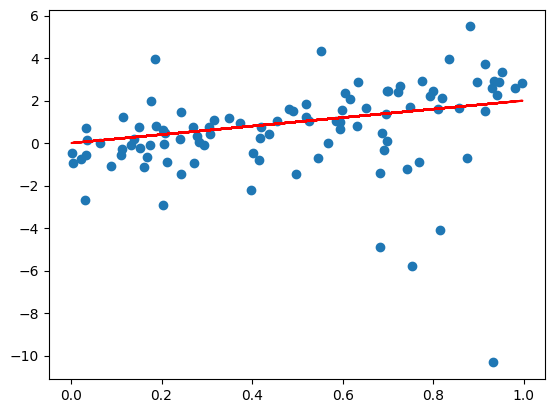

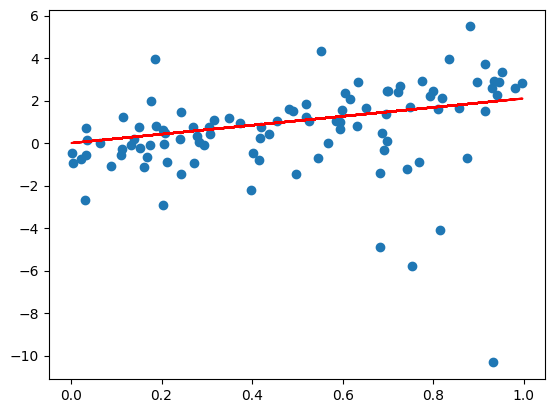

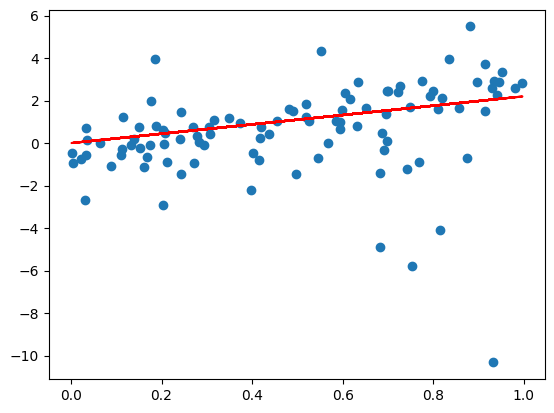

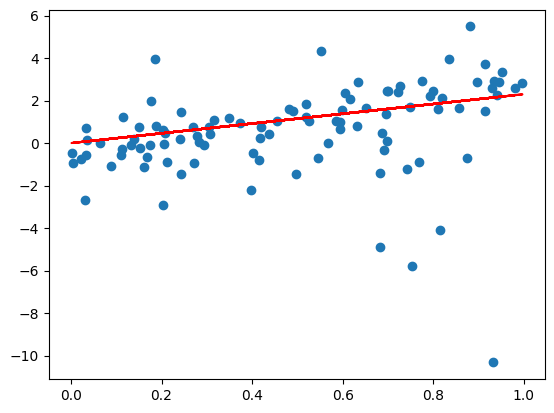

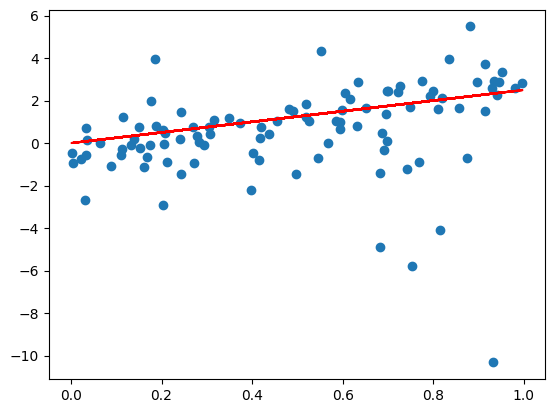

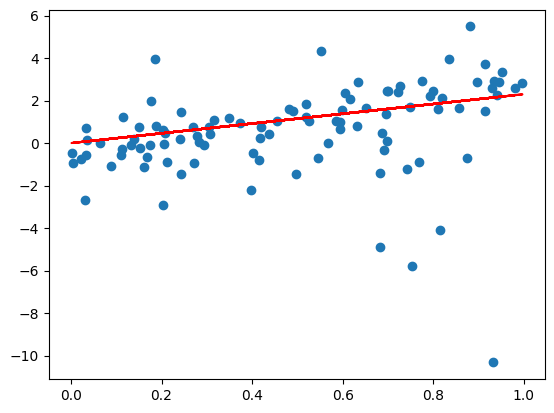

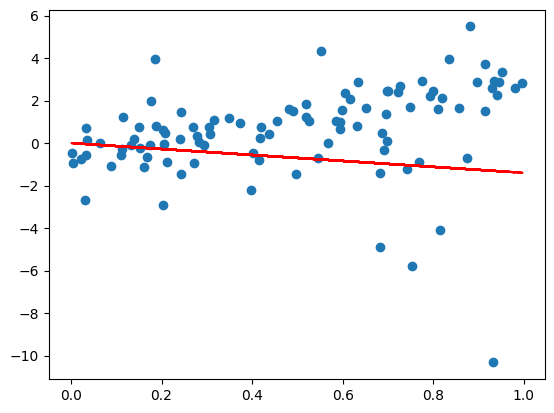

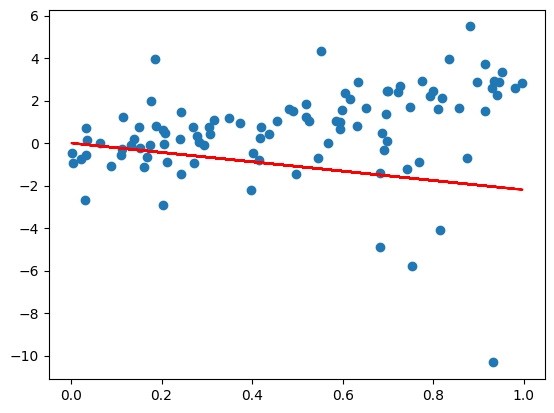

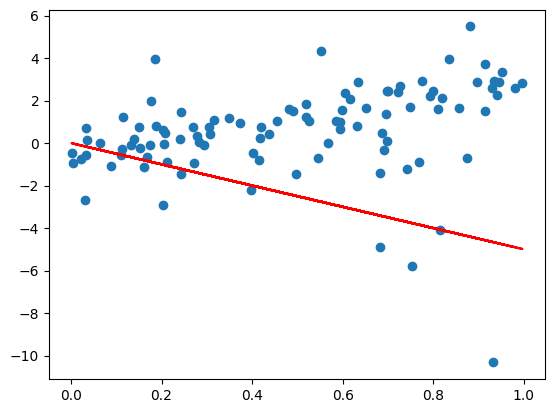

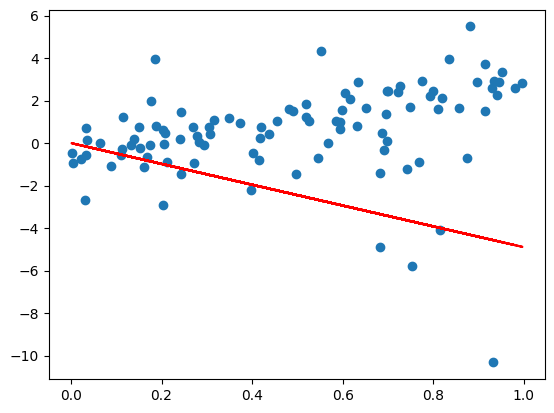

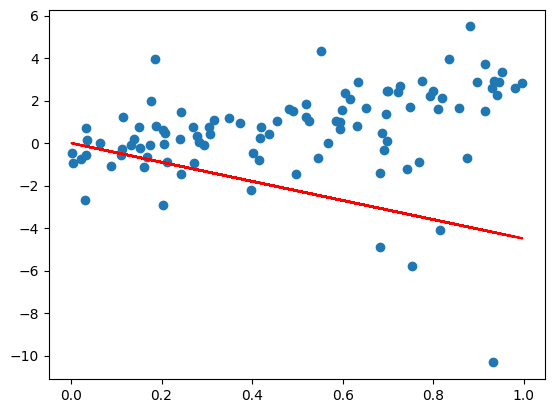

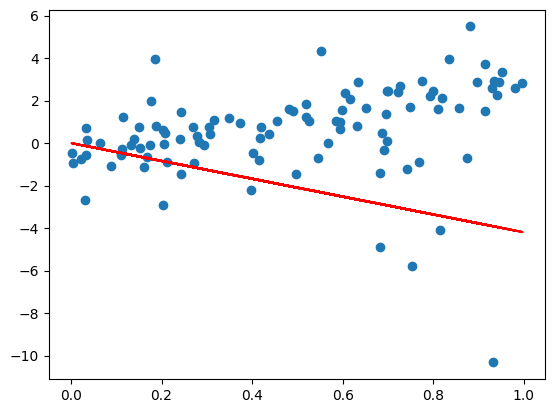

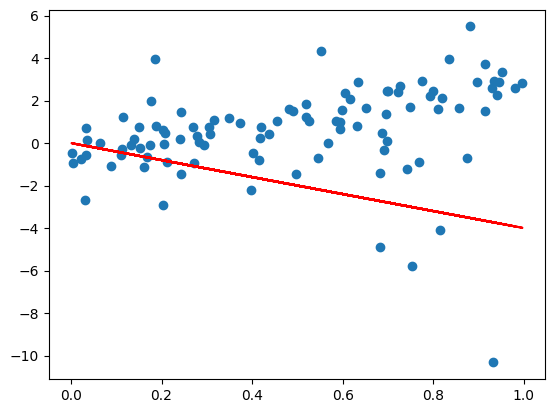

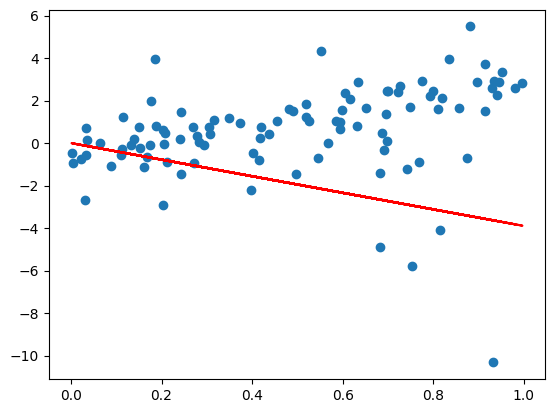

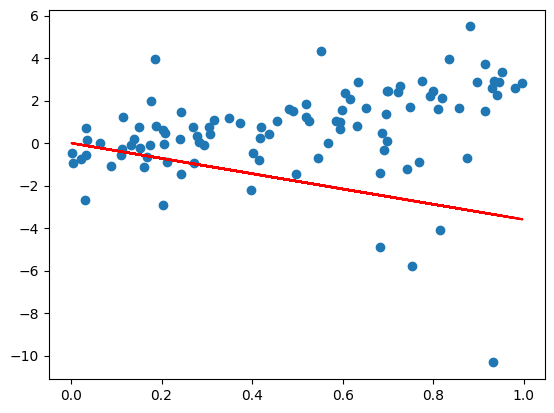

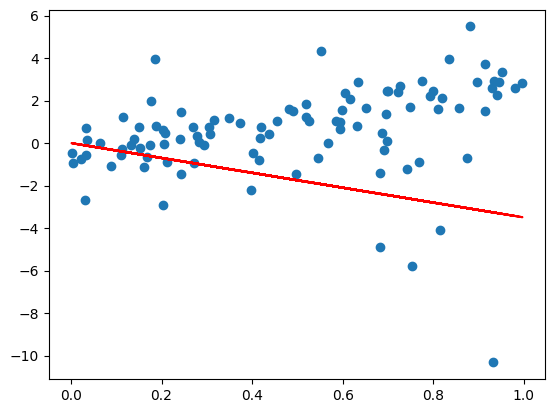

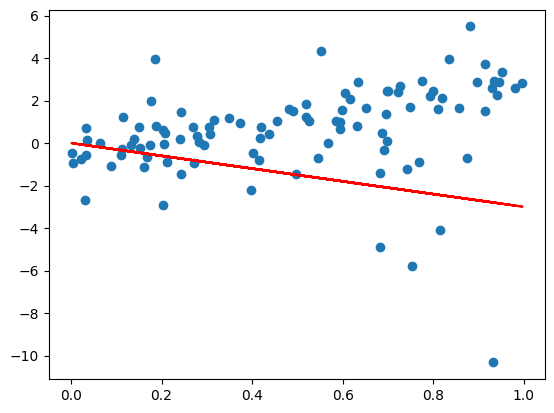

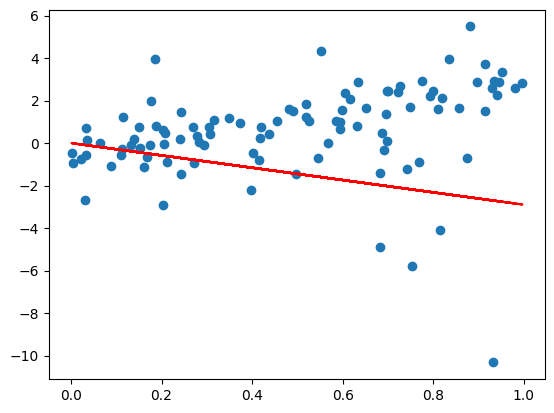

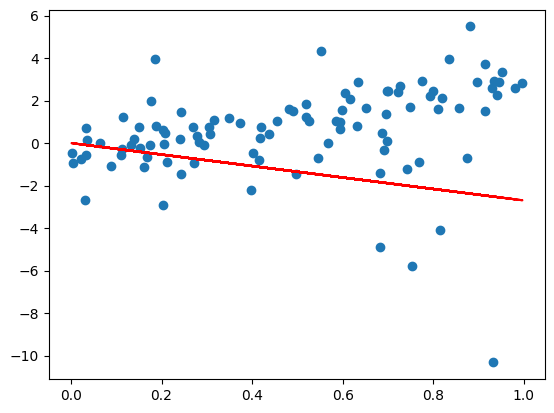

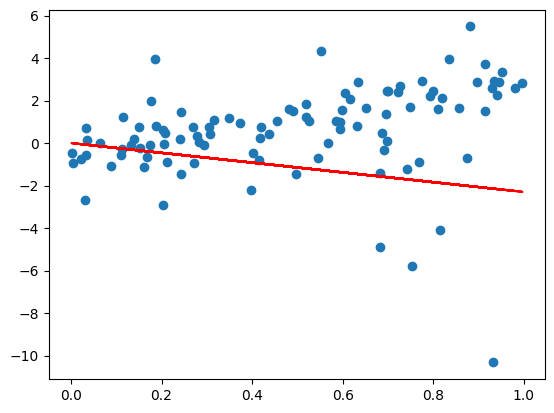

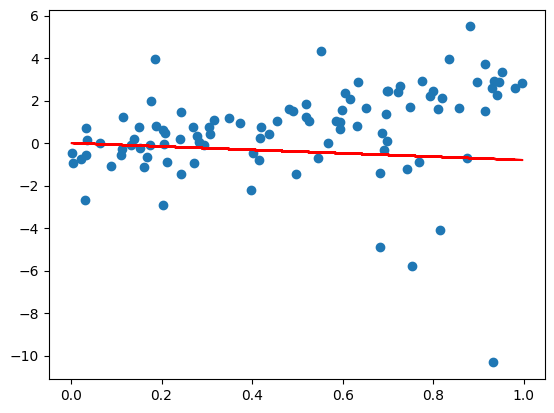

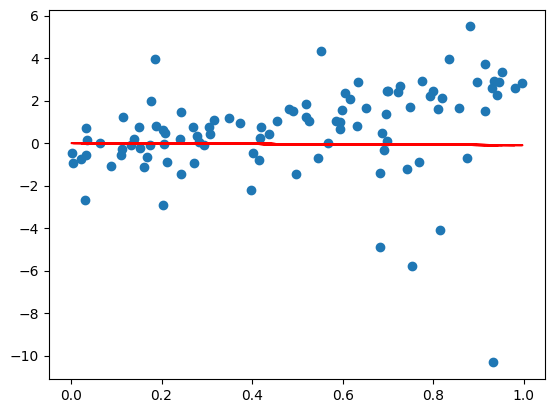

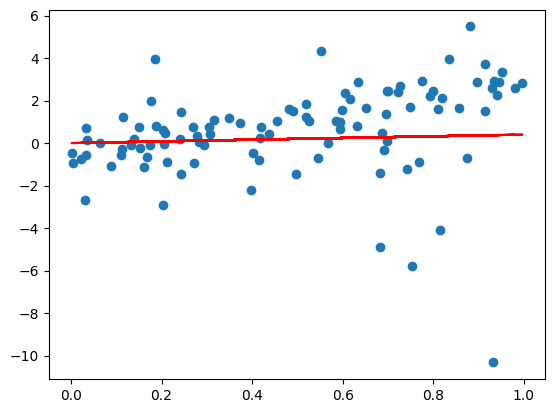

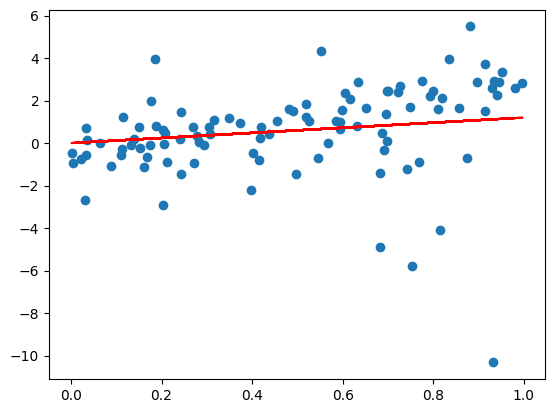

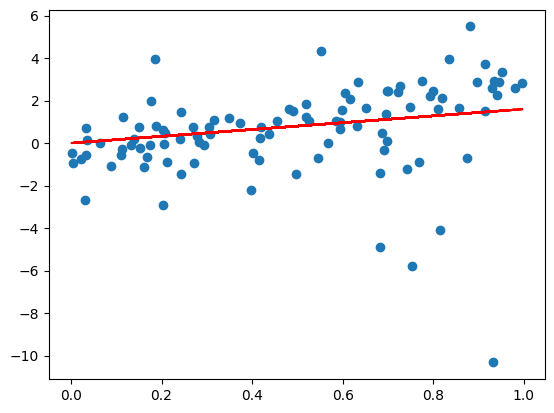

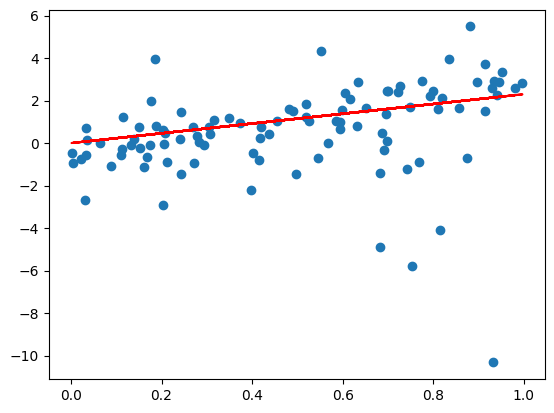

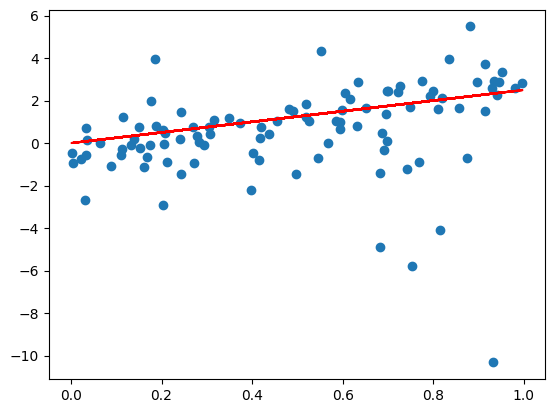

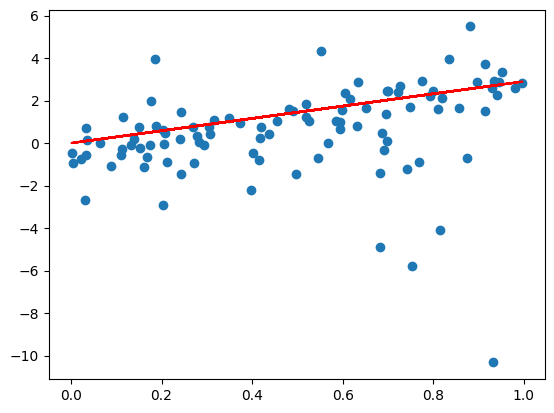

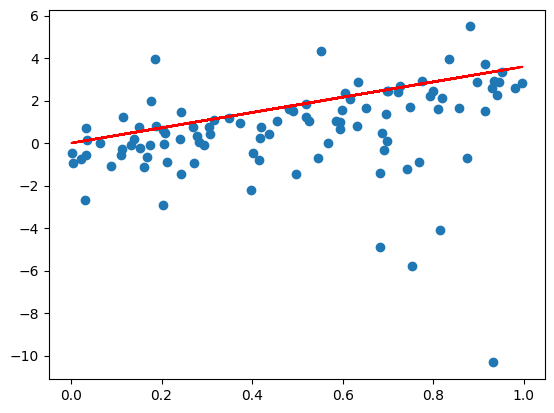

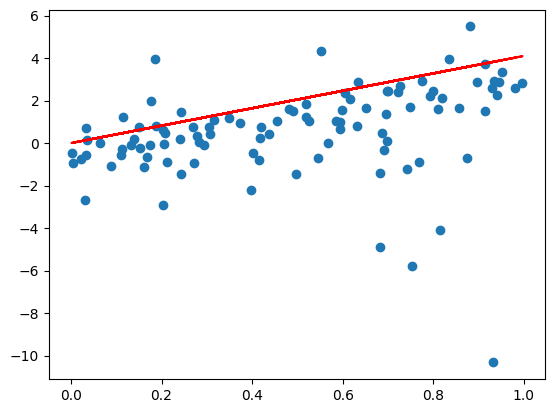

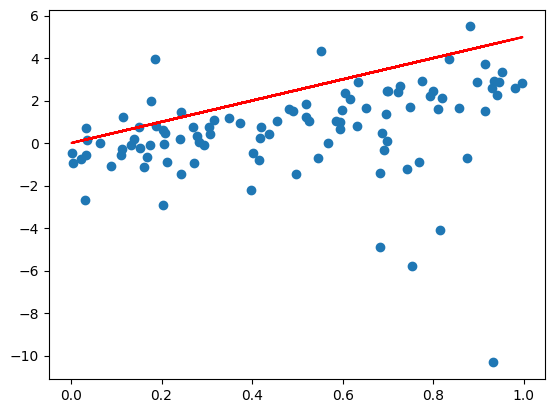

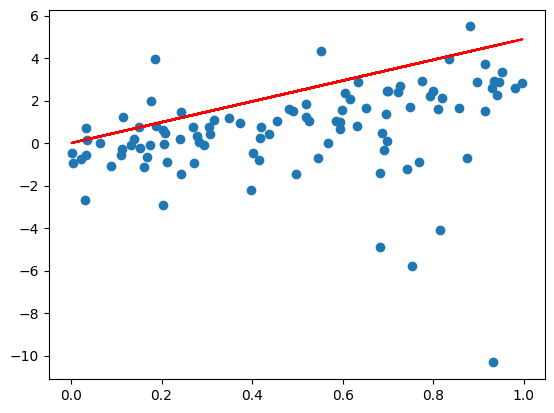

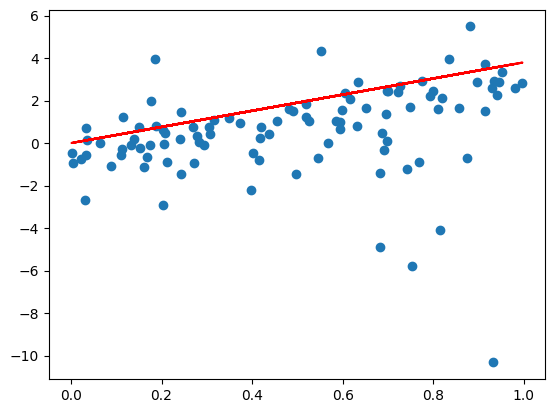

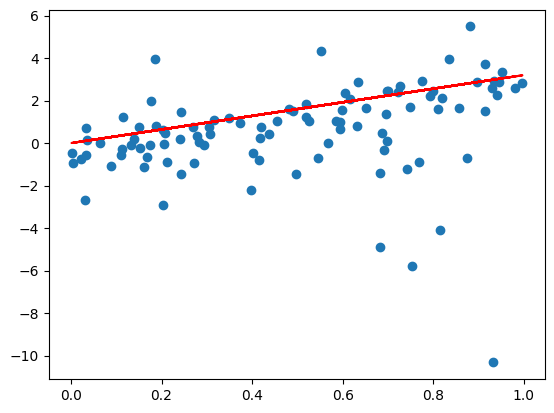

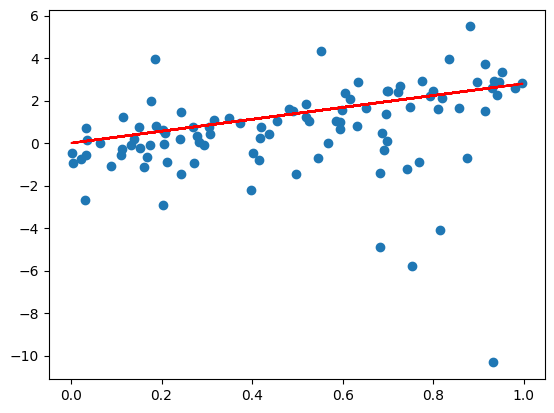

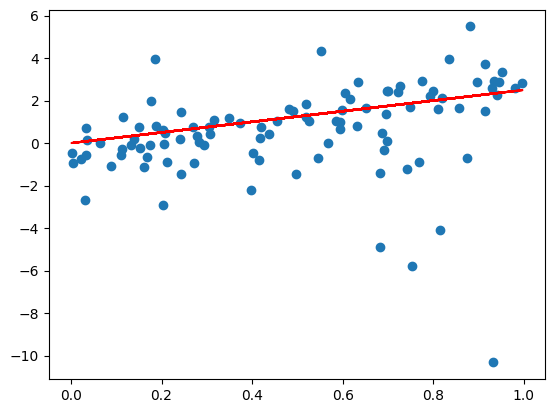

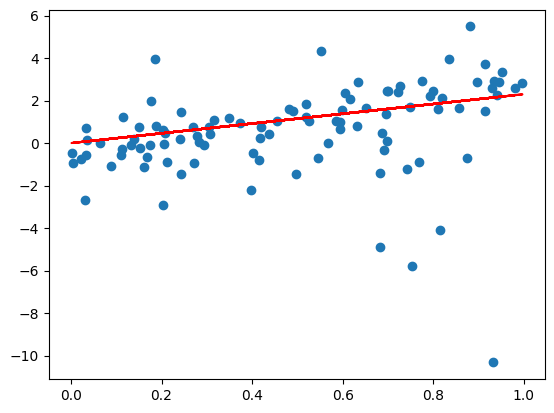

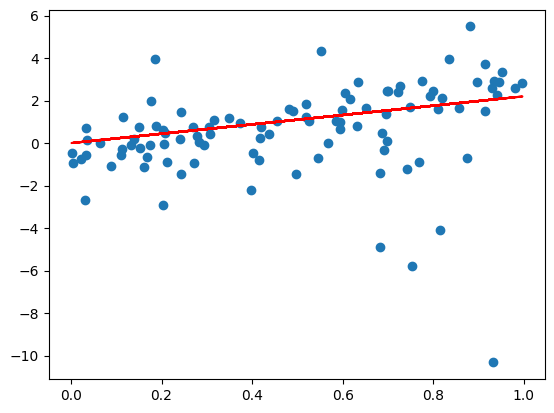

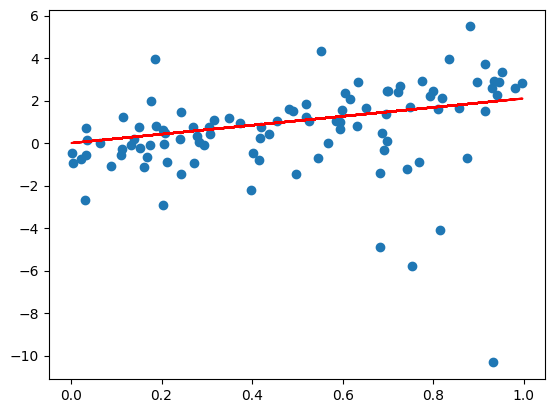

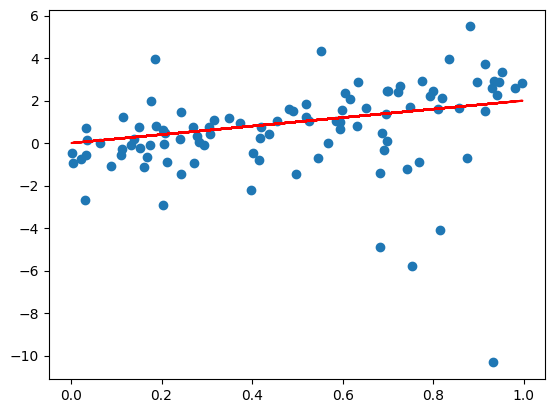

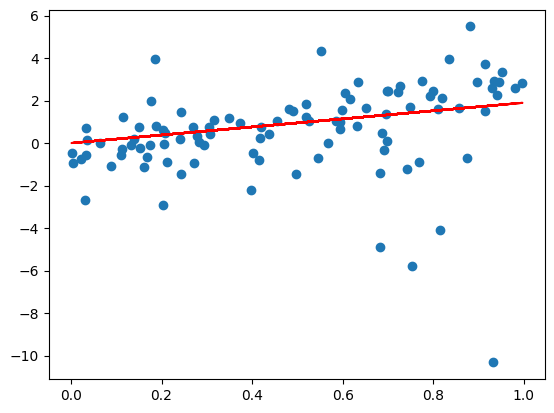

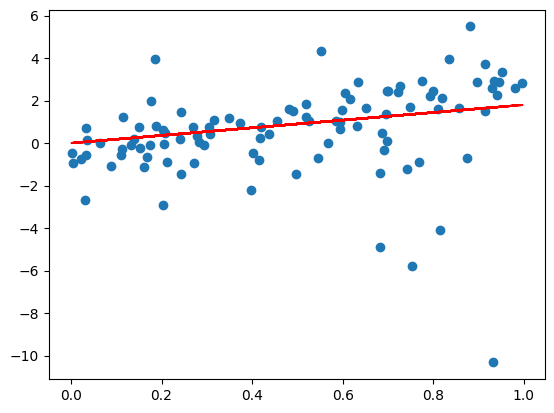

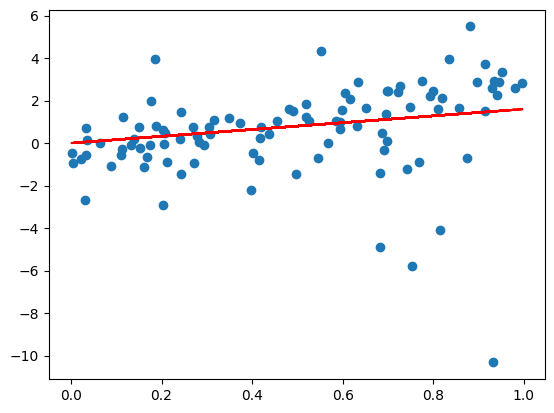

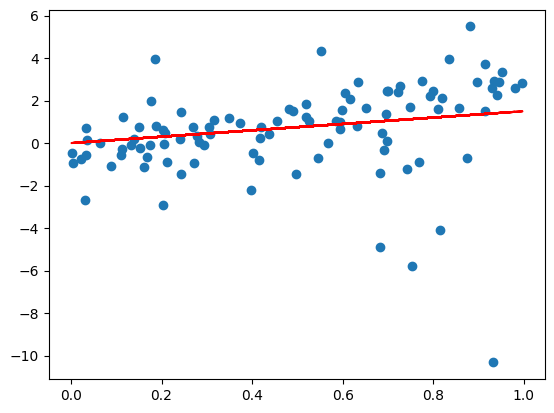

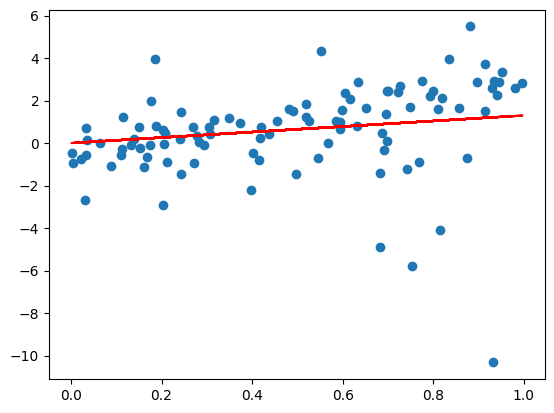

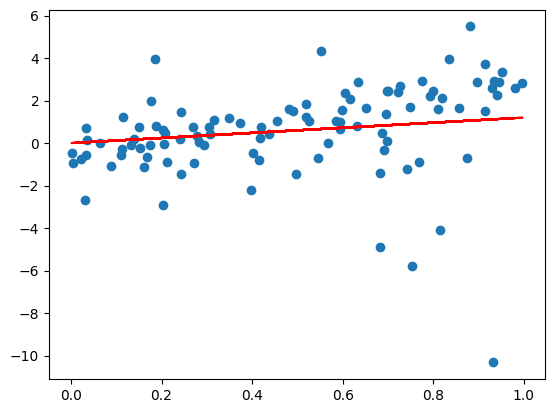

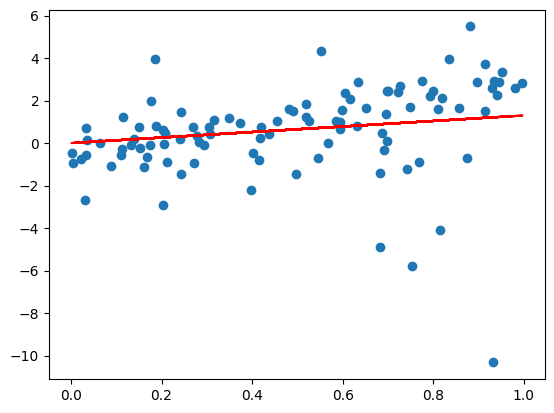

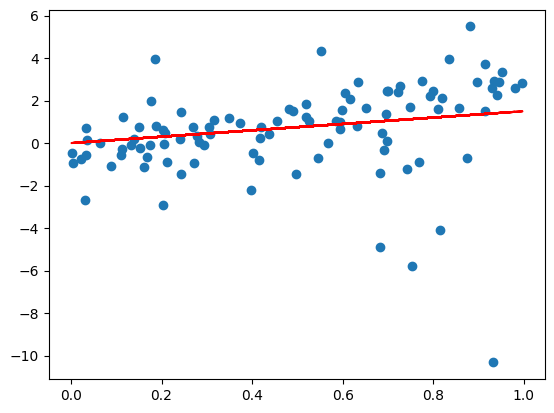

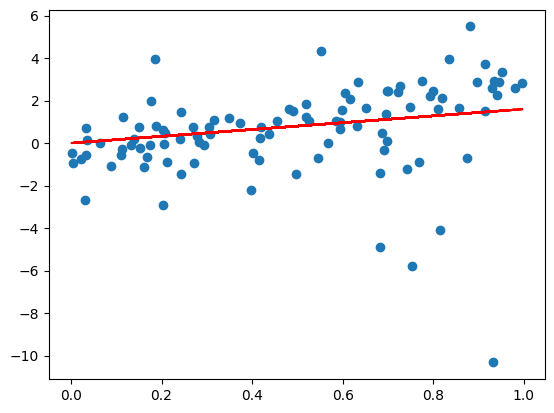

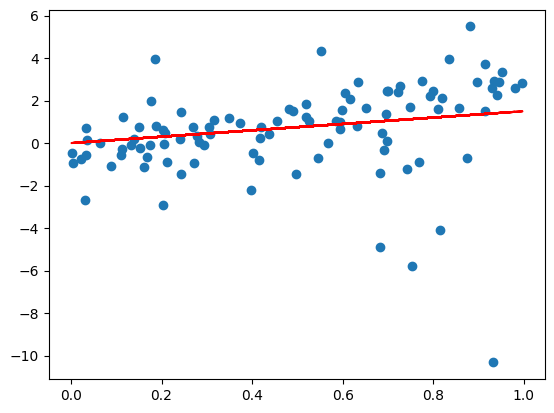

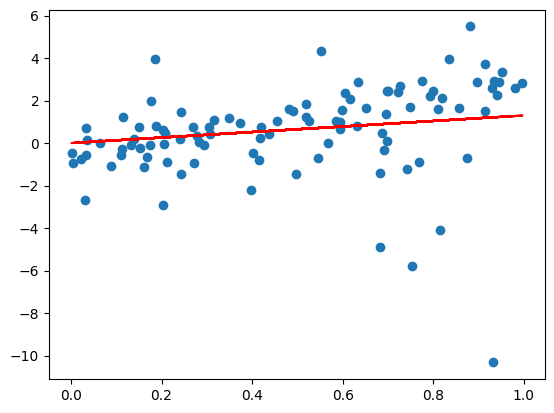

In [11]:
bias =0.0
@widgets.interact(slope=(-5.0, 5.0))
def plot_linreg(slope):
    # Predicted y values
    y_pred = slope * x + bias

    # Plot the scatterplot
    plt.scatter(x, y_true)

    # Plot the regression line
    plt.plot(x, y_pred, 'r')

    # Calculate residuals, MSE, and MAE
    resid = y_true - y_pred
    mse = torch.mean((y_true - y_pred) ** 2).item()
    mae = torch.mean(torch.abs(y_true - y_pred)).item()

    # Print the MSE and MAE
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")

### **- Slope that minimizes MSE: 1.30**
### **- Slope that minimizes MAE: 2.30**
### **- Description of the difference:**

The difference between the slope that minimizes MSE (1.30) and the slope that minimizes MAE (2.30) lies in how they are influenced by outliers.

- **MSE (Mean Squared Error):**
1.   MSE squares the residuals, making larger errors more impactful.
2.   It is more sensitive to outliers with large residuals, as squaring magnifies their effect on the loss.
3. The slope that minimizes MSE tends to be influenced by the outliers, resulting in a line that might try to fit them.

- **MAE (Mean Absolute Error)**:

1. MAE takes the absolute value of residuals, treating all errors equally regardless of magnitude.
2. It is less sensitive to outliers, as it does not magnify the impact of large errors.
3. The slope that minimizes MAE tends to be less influenced by outliers, resulting in a line that is more robust to extreme values.

# **Gradient**

**Computing Linear MSE**

In [15]:
def calculate_mse(slope, x, y_true, bias=0.0):
    y_pred = slope * x + bias
    mse = torch.mean((y_true - y_pred)**2).item()
    return mse

slope_values = [1.0, 1.3, 1.5, 2.0, 2.3, 2.5]

for slope in slope_values:
    current_mse = calculate_mse(slope, x, y_true)
    print(f"For Slope {slope}, MSE: {current_mse:.2f}")


For Slope 1.0, MSE: 4.33
For Slope 1.3, MSE: 4.28
For Slope 1.5, MSE: 4.28
For Slope 2.0, MSE: 4.39
For Slope 2.3, MSE: 4.54
For Slope 2.5, MSE: 4.67



**Numerical Gradient Calculation for Linear Regression Mean Squared Error (MSE)**

In [17]:
def calculate_numerical_gradient(x0, eps, x, y_true):
    numerical_gradient = (calculate_mse(x0 + eps, x, y_true) - calculate_mse(x0, x, y_true)) / eps
    return numerical_gradient

eps = 1e-3
x0_1, x0_2 = 0.0, 1.40

numerical_gradient_1 = calculate_numerical_gradient(x0_1, eps, x, y_true)
numerical_gradient_2 = calculate_numerical_gradient(x0_2, eps, x, y_true)

print(f"Numerical Gradient (x0 = {x0_1}): {numerical_gradient_1:.2f}")
print(f"Numerical Gradient (x0 = {x0_2}): {numerical_gradient_2:.2f}")


Numerical Gradient (x0 = 0.0): -0.91
Numerical Gradient (x0 = 1.4): 0.00


**Gradient Ascent for Linear Regression Mean Squared Error (MSE)**

In [19]:
def perform_gradient_ascent(initial_slope, eps, x, y_true, alpha):
    initial_loss = calculate_mse(initial_slope, x, y_true)
    gradient = (calculate_mse(initial_slope + eps, x, y_true) - initial_loss) / eps
    updated_slope = initial_slope + alpha * gradient
    updated_loss = calculate_mse(updated_slope, x, y_true)

    return initial_loss, gradient, updated_slope, updated_loss

initial_slope_ascent, alpha = 0.0, 0.01
initial_loss_ascent, gradient_ascent, slope_ascent, updated_loss_ascent = perform_gradient_ascent(
    initial_slope_ascent, eps, x, y_true, alpha
)

print(f"Initial Slope: {initial_slope_ascent}, Initial Loss: {initial_loss_ascent:.2f}")
print(f"Updated Slope (Gradient Ascent): {slope_ascent:.2f}")
print(f"Updated Loss (Gradient Ascent): {updated_loss_ascent:.2f}")


Initial Slope: 0.0, Initial Loss: 4.91
Updated Slope (Gradient Ascent): -0.01
Updated Loss (Gradient Ascent): 4.92


**Gradient Descent for Linear Regression Mean Squared Error (MSE)**

In [20]:
def perform_gradient_descent(initial_slope, eps, x, y_true, alpha):
    initial_loss = calculate_mse(initial_slope, x, y_true)
    gradient = (initial_loss - calculate_mse(initial_slope - eps, x, y_true)) / eps
    updated_slope = initial_slope - alpha * gradient
    updated_loss = calculate_mse(updated_slope, x, y_true)

    return initial_loss, gradient, updated_slope, updated_loss

initial_slope_descent, alpha = 0.0, 0.01
initial_loss_descent, gradient_descent, slope_descent, updated_loss_descent = perform_gradient_descent(
    initial_slope_descent, eps, x, y_true, alpha
)

print(f"Initial Slope: {initial_slope_descent}, Initial Loss: {initial_loss_descent:.2f}")
print(f"Updated Slope (Gradient Descent): {slope_descent:.2f}")
print(f"Updated Loss (Gradient Descent): {updated_loss_descent:.2f}")


Initial Slope: 0.0, Initial Loss: 4.91
Updated Slope (Gradient Descent): 0.01
Updated Loss (Gradient Descent): 4.90
